In [ ]:
!pip install gym #0.17.3
!pip install jupyterplot

In [38]:
import numpy as np

In [1]:
import gym
from gym.envs.registration import register
register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True})
# transition kernal is not determinstic
env = gym.make('D4x4-FrozenLake-v0')
gamma = 0.9

In [2]:
#Obtaining environment details 
print('Number of Actions', env.nA) 
print('Number of States ', env.nS)
print('P[10,3]', env.P[10][3])

Number of Actions 4
Number of States  16
P[10,3] [(0.3333333333333333, 11, 0.0, True), (0.3333333333333333, 6, 0.0, False), (0.3333333333333333, 9, 0.0, False)]


In [3]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [51]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from jupyterplot import ProgressPlot
import numpy as np
from numpy.linalg import norm
def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                # down
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                # up
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                # right
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                # left
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

# test_value = np.random.rand(16) #Random Value Function (only for plotting)
# test_policy = np.random.randint(0,3,16) #Random Policy (only for plotting)
# print(test_value)
# print(test_policy)

In [64]:
gamma = 0.9
theta = 1e-06
env.reset()
env.seed(0)
def value_iteration(env):
    pp = ProgressPlot(line_names=['value delta'])
    v_ = np.zeros(env.nS)
    theta = 1e-9
    for i in range(100000):
        u_v_ = np.copy(v_)

        for state in range(env.nS):
            Q_value = []
            for action in range(env.nA):
                n_rewards = []
                for n_ in env.P[state][action]:
                    t_prob, n_state, reward, terminal = n_
                    n_rewards.append((t_prob*(reward+gamma*u_v_[n_state])))
                    Q_value.append(np.sum(n_rewards))
                    v_[state] = max(Q_value)
        delta = np.sum(norm(u_v_-v_))
        pp.update(delta)
        if(delta <= theta):break
    pp.finalize()
    return v_

def get_policy_and_optimal_q(v_):
    policy = np.zeros(env.nS)
    optimal_q = []
    for state in range(env.nS):
        Q = np.zeros(env.nA)
        for action in range(env.nA):
            for n_ in env.P[state][action]:
                t_prob, n_state, reward, terminal = n_
                Q[action] += (t_prob * (reward+gamma*v_[n_state]))
        policy[state] = np.argmax(Q)
        optimal_q.append(Q)
    return policy, optimal_q

value = value_iteration(env)
policy, optimal_q = get_policy_and_optimal_q(value)

In [65]:
value

array([0.0688909 , 0.06141457, 0.07440976, 0.05580732, 0.09185454,
       0.        , 0.11220821, 0.        , 0.14543635, 0.24749695,
       0.29961759, 0.        , 0.        , 0.3799359 , 0.63902015,
       0.        ])

In [66]:
policy

array([0., 3., 0., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])

In [67]:
optimal_q

[array([0.0688909 , 0.066648  , 0.066648  , 0.05975891]),
 array([0.03909164, 0.0429902 , 0.0407473 , 0.06141457]),
 array([0.07440976, 0.06882903, 0.07272759, 0.05748949]),
 array([0.03906512, 0.03906512, 0.03348439, 0.05580732]),
 array([0.09185454, 0.07118727, 0.06429818, 0.04822363]),
 array([0., 0., 0., 0.]),
 array([0.11220821, 0.08988528, 0.11220821, 0.02232293]),
 array([0., 0., 0., 0.]),
 array([0.07118727, 0.11787999, 0.10180545, 0.14543635]),
 array([0.15761168, 0.24749695, 0.20386605, 0.13351618]),
 array([0.29961759, 0.26595513, 0.22536851, 0.10791155]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0.18822986, 0.30568681, 0.3799359 , 0.26595513]),
 array([0.39557209, 0.63902015, 0.61492466, 0.53719938]),
 array([0., 0., 0., 0.])]

Value Function [0.0688909  0.06141457 0.07440976 0.05580732 0.09185454 0.
 0.11220821 0.         0.14543635 0.24749695 0.29961759 0.
 0.         0.3799359  0.63902015 0.        ]
Policy [0. 3. 0. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


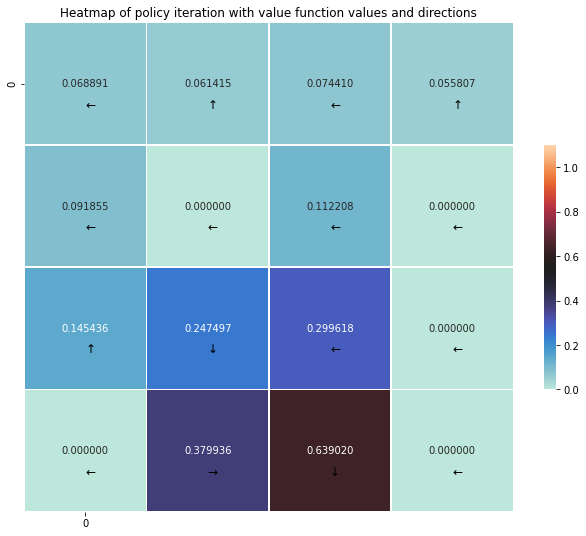

In [68]:
fancy_visual(value, policy)

In [69]:
%%shell
jupyter nbconvert --to html /content/VI.ipynb

[NbConvertApp] Converting notebook /content/VI.ipynb to html
[NbConvertApp] Writing 611817 bytes to /content/VI.html
